In [ ]:
import pandas as pd
from pandasql import sqldf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r"movies.csv")

In [ ]:
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


# Data Cleaning

## 1. Dropping all the duplicates to ensure integrity in our analysis

In [ ]:
df= df.drop_duplicates()

## 2. Removing extra characters from year, genre and one-line column

In [ ]:
# Removing non-numeric characters from the 'YEAR' column
df["YEAR"] = df["YEAR"].str.replace(r'\D', '')
# Removing newline characters from the start and end of strings in the 'GENRE' column
df["GENRE"] = df["GENRE"].str.strip().str.replace('\n', ' ').str.strip()
# Retaining only alphanumeric characters and spaces in the 'ONE-LINE' column
df["ONE-LINE"] = df["ONE-LINE"].str.replace(r'[^a-zA-Z0-9\s]', '')

df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,20102022,"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\nA prequel set before the events of Army of t...,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


## 3. Formatting year column

In [ ]:
df["YEAR"] = df["YEAR"].astype(str)
df["YEAR"] = df["YEAR"].str[:4] + df["YEAR"].str[4:].apply(lambda x: ", " + x if x else "")
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\nA prequel set before the events of Army of t...,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

MOVIES         0
YEAR           0
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

## 4. Creating new dataframe where movie gross in not null (As there are more than 85% null values for Gross column)

In [ ]:
df['Gross'].unique()
Movie_Gross_Value = df[df['Gross'].notnull()]

In [ ]:
Movie_Gross_Value.reset_index(drop = True)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,\nThe worlds top bodyguard gets a new client a...,\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
1,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
2,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,\nHoping to walk away with a massive fortune a...,\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
3,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
4,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M
...,...,...,...,...,...,...,...,...,...
455,Vidal Sassoon: The Movie,2010,Documentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245,90.0,$0.09M
456,Men at Lunch,2012,"Documentary, Mystery",6.3,\nThe story of Lunch atop a Skyscraper the ico...,\n Director:\nSeán Ó Cualáin\n| \n Stars...,331,75.0,$0.00M
457,Decoding Deepak,2012,Documentary,5.5,\nDeepak Chopras son Gotham spends a year trav...,\n Director:\nGotham Chopra\n| \n Stars:...,124,83.0,$0.01M
458,Theo Who Lived,2016,Documentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111,86.0,$0.01M


## 5. Creating new Dataframe where rating and votes are None in main dataframe> This is done as the rows wothout rating and votes are not very useful.

In [ ]:
# Extracting movies without ratings or votes for separate analysis
unrated_movies = df[df['VOTES'].isna() & df['RATING'].isna()]

# Removing movies without ratings or votes from the main dataframe
df = df.dropna(subset=['RATING', 'VOTES'])

# Removing the 'Gross' column from the main dataframe
df = df.drop(columns=['Gross'])

df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0
5,Outer Banks,2020,"Action, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0
...,...,...,...,...,...,...,...,...
9960,Sexify,2021,"Comedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,\n Director:\nKalina Alabrudzinska\n| \n ...,103,37.0
9961,Sexify,2021,"Comedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,\n Director:\nKalina Alabrudzinska\n| \n ...,96,40.0
9962,Sexify,2021,"Comedy, Drama",7.1,\nThe big pitch at the university tech competi...,\n Director:\nKalina Alabrudzinska\n| \n ...,100,47.0
9963,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,\nLenore urges Hector to not test Camillas pat...,\n Director:\nSam Deats\n| \n Stars:\nRi...,911,24.0


## 6. Removing characters from gross and votes column and changing data types

In [ ]:
# Cleaning the 'VOTES' and 'Gross' columns in Movie_Gross_Value to retain only numeric characters and periods
Movie_Gross_Value["VOTES"] = Movie_Gross_Value["VOTES"].str.replace(r'\D', '').astype(float)
Movie_Gross_Value["Gross"] = Movie_Gross_Value["Gross"].str.replace(r'\D', '').astype(float)

Movie_Gross_Value


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,\nThe worlds top bodyguard gets a new client a...,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,7547.0
85,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,40245.0
95,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,\nHoping to walk away with a massive fortune a...,\n Director:\nFede Alvarez\n| \n Stars:\...,237601.0,88.0,8922.0
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,1713028.0,178.0,31554.0
125,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,99351.0,99.0,5701.0
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,Documentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245.0,90.0,9.0
5770,Men at Lunch,2012,"Documentary, Mystery",6.3,\nThe story of Lunch atop a Skyscraper the ico...,\n Director:\nSeán Ó Cualáin\n| \n Stars...,331.0,75.0,0.0
5835,Decoding Deepak,2012,Documentary,5.5,\nDeepak Chopras son Gotham spends a year trav...,\n Director:\nGotham Chopra\n| \n Stars:...,124.0,83.0,1.0
6056,Theo Who Lived,2016,Documentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111.0,86.0,1.0


In [ ]:
Movie_Gross_Value.dtypes

MOVIES       object
YEAR         object
GENRE        object
RATING      float64
ONE-LINE     object
STARS        object
VOTES       float64
RunTime     float64
Gross       float64
dtype: object

## 7. Splitting stars column into directors column and stars column

In [ ]:
# Splitting the 'STARS' column into two separate columns
split_data = df['STARS'].str.split('Stars:', 1, expand=True)
df['Directors'] = split_data[0]
df['Stars'] = split_data[1].fillna("")

# Removing the original 'STARS' column from the dataframe
df.drop(columns=['STARS'], inplace=True)

df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"21,062",121.0,\n Director:\nPeter Thorwarth\n| \n,"\nPeri Baumeister, \nCarl Anton Koch, \nAlexan..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"17,870",25.0,\n \n,"\nChris Wood, \nSarah Michelle Gellar, \nLena ..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"885,805",44.0,\n \n,"\nAndrew Lincoln, \nNorman Reedus, \nMelissa M..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"414,849",23.0,\n \n,"\nJustin Roiland, \nChris Parnell, \nSpencer G..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"25,858",50.0,\n \n,"\nChase Stokes, \nMadelyn Cline, \nMadison Bai..."
...,...,...,...,...,...,...,...,...,...
9960,Sexify,2021,"Comedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,103,37.0,\n Director:\nKalina Alabrudzinska\n| \n,"\nAleksandra Skraba, \nMaria Sobocinska, \nSan..."
9961,Sexify,2021,"Comedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,96,40.0,\n Director:\nKalina Alabrudzinska\n| \n,"\nAleksandra Skraba, \nMaria Sobocinska, \nSan..."
9962,Sexify,2021,"Comedy, Drama",7.1,\nThe big pitch at the university tech competi...,100,47.0,\n Director:\nKalina Alabrudzinska\n| \n,"\nAleksandra Skraba, \nMaria Sobocinska, \nSan..."
9963,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,\nLenore urges Hector to not test Camillas pat...,911,24.0,\n Director:\nSam Deats\n| \n,"\nRichard Armitage, \nJames Callis, \nAlejandr..."


## 8. Splitting the directors column into half with ':' and taking the 1st index value and saving into directors column and doing same with the stars column

In [ ]:

# Refining the 'directors' column to retain data after the colon
df['Directors'] = df['Directors'].str.split(':').str.get(1).str.strip()

# Cleaning the entire dataframe of newline characters
df = df.replace(r'\n', '', regex=True)

# Cleaning specific columns for unwanted characters
df["Directors"] = df["Directors"].str.replace(r'[^a-zA-Z0-9\s]', '').str.strip()
df["VOTES"] = df["VOTES"].str.replace(r'\D', '')

df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...
9960,Sexify,2021,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,103,37.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9961,Sexify,2021,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,96,40.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9962,Sexify,2021,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,100,47.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9963,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,Lenore urges Hector to not test Camillas patie...,911,24.0,Sam Deats,"Richard Armitage, James Callis, Alejandra Reyn..."


In [ ]:
df.reset_index(drop=True)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...
8163,Sexify,2021,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,103,37.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8164,Sexify,2021,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,96,40.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8165,Sexify,2021,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,100,47.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8166,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,Lenore urges Hector to not test Camillas patie...,911,24.0,Sam Deats,"Richard Armitage, James Callis, Alejandra Reyn..."


## Exporting all the dataframes as files for running in SQL

In [ ]:
Movies_details = df
Movies_details.to_excel('Movies_details.xlsx', index=False)
unrated_movies.to_excel('unrated_movies.xlsx', index=False)
Movie_Gross_Value.to_excel('Movie_Gross_Value.xlsx', index=False)
Movies_details

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...
9960,Sexify,2021,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,103,37.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9961,Sexify,2021,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,96,40.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9962,Sexify,2021,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,100,47.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9963,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,Lenore urges Hector to not test Camillas patie...,911,24.0,Sam Deats,"Richard Armitage, James Callis, Alejandra Reyn..."


In [ ]:
import numpy as np

## 9. Replacing None value with 'No Directors' in directors column

In [ ]:
Movies_details["Directors"]=Movies_details["Directors"].str.replace('None','No Directors')

## 10. Clearing duplicates having same movie name, year, genre and stars as it indicates duplication of data

In [ ]:
# Remove rows with duplicate values in the 'MOVIES', 'YEAR', 'GENRE', and 'Directors' columns
unique_columns = ['MOVIES', 'YEAR', 'GENRE', 'Directors']
df = df.drop_duplicates(subset=unique_columns, keep='first')

df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...
9953,"Love, Death & Robots",2019,"Animation, Short, Comedy",7.4,On Christmas Eve a young girl and her little b...,6163,7.0,Elliot Dear,"Divi Mittal, Sami Amber, Fred Tatasciore, Bryn..."
9954,"Love, Death & Robots",2019,"Animation, Short, Comedy",7.0,When a two hundred foot tall naked body washes...,5868,13.0,Tim Miller,"Steven Pacey, Laura Pacey, Kayli Tran"
9955,"Love, Death & Robots",2019,"Animation, Short, Comedy",7.9,On an arid scorched planet at the edge of gala...,6873,18.0,Dominique Boidin Lon Brelle Rmi Kozyra Maxime ...,"Peter Franzén, Zita Hanrot, Alaïs Lawson, Jonn..."
9959,Sexify,2021,"Comedy, Drama",6.8,Monikas idea for gathering data is a hit but N...,108,38.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."


## View Movies_details dataframe

In [ ]:
Movies_details


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Directors,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,21062,121.0,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,17870,25.0,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"2010, 2022","Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,414849,23.0,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
5,Outer Banks,2020,"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,25858,50.0,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...
9960,Sexify,2021,"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,103,37.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9961,Sexify,2021,"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,96,40.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9962,Sexify,2021,"Comedy, Drama",7.1,The big pitch at the university tech competiti...,100,47.0,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
9963,Castlevania,"2017, 2021","Animation, Action, Adventure",8.2,Lenore urges Hector to not test Camillas patie...,911,24.0,Sam Deats,"Richard Armitage, James Callis, Alejandra Reyn..."


## View unrated_movies dataframe

In [ ]:
unrated_movies

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,\nA prequel set before the events of Army of t...,\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
24,He-Man and the Masters of the Universe,2021,"Animation, Action, Adventure",NaN,\nEternias Prince Adam discovers the power of ...,\n,NaN,NaN,NaN
214,Sing 2,2021,"Animation, Adventure, Comedy",NaN,\nBuster Moon and his friends must persuade re...,\n Director:\nGarth Jennings\n| \n Stars...,NaN,NaN,NaN
217,Knives Out 2,2022,"Comedy, Crime, Drama",NaN,\nPlot unknown Sequel to the 2019 film Knives Out,\n Director:\nRian Johnson\n| \n Stars:\...,NaN,NaN,NaN
222,Don't Look Up,2021,Comedy,NaN,\nThe story of two lowlevel astronomers who mu...,\n Director:\nAdam McKay\n| \n Stars:\nT...,NaN,145.0,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


## View Movies_Gross_Value DataFrame

In [ ]:
Movie_Gross_Value

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,2017,"Action, Comedy, Crime",6.9,\nThe worlds top bodyguard gets a new client a...,\n Director:\nPatrick Hughes\n| \n Stars...,205979.0,118.0,7547.0
85,Jurassic Park,1993,"Action, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,897444.0,127.0,40245.0
95,Don't Breathe,2016,"Crime, Horror, Thriller",7.1,\nHoping to walk away with a massive fortune a...,\n Director:\nFede Alvarez\n| \n Stars:\...,237601.0,88.0,8922.0
111,The Lord of the Rings: The Fellowship of the Ring,2001,"Action, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,1713028.0,178.0,31554.0
125,Escape Room,2019,"Action, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,99351.0,99.0,5701.0
...,...,...,...,...,...,...,...,...,...
5750,Vidal Sassoon: The Movie,2010,Documentary,6.5,\nVidal Sassoon is more than just a hairdresse...,\n Director:\nCraig Teper\n| \n Stars:\n...,245.0,90.0,9.0
5770,Men at Lunch,2012,"Documentary, Mystery",6.3,\nThe story of Lunch atop a Skyscraper the ico...,\n Director:\nSeán Ó Cualáin\n| \n Stars...,331.0,75.0,0.0
5835,Decoding Deepak,2012,Documentary,5.5,\nDeepak Chopras son Gotham spends a year trav...,\n Director:\nGotham Chopra\n| \n Stars:...,124.0,83.0,1.0
6056,Theo Who Lived,2016,Documentary,6.8,\nA documentary on American journalist Theo Pa...,\n Director:\nDavid Schisgall\n| \n Star...,111.0,86.0,1.0


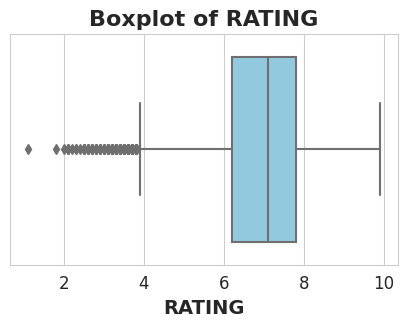

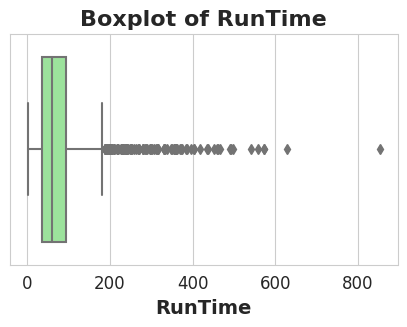

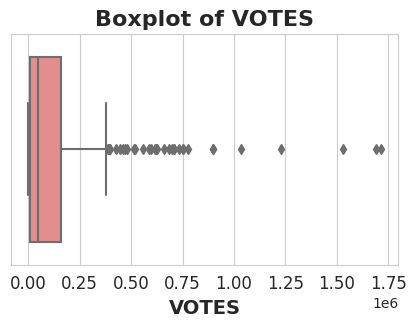

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting a common style and size for the boxplots
sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))

# Boxplot for 'RATING' column
sns.boxplot(data=Movies_details, x='RATING', color='skyblue')
plt.xlabel('RATING', fontsize=14, fontweight='bold')
plt.title('Boxplot of RATING', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.show()

# Boxplot for 'RunTime' column
plt.figure(figsize=(5, 3))
sns.boxplot(data=Movies_details, x='RunTime', color='lightgreen')
plt.xlabel('RunTime', fontsize=14, fontweight='bold')
plt.title('Boxplot of RunTime', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.show()

# Boxplot for 'VOTES' column
plt.figure(figsize=(5, 3))
sns.boxplot(data=Movie_Gross_Value, x='VOTES', color='lightcoral')
plt.xlabel('VOTES', fontsize=14, fontweight='bold')
plt.title('Boxplot of VOTES', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.show()


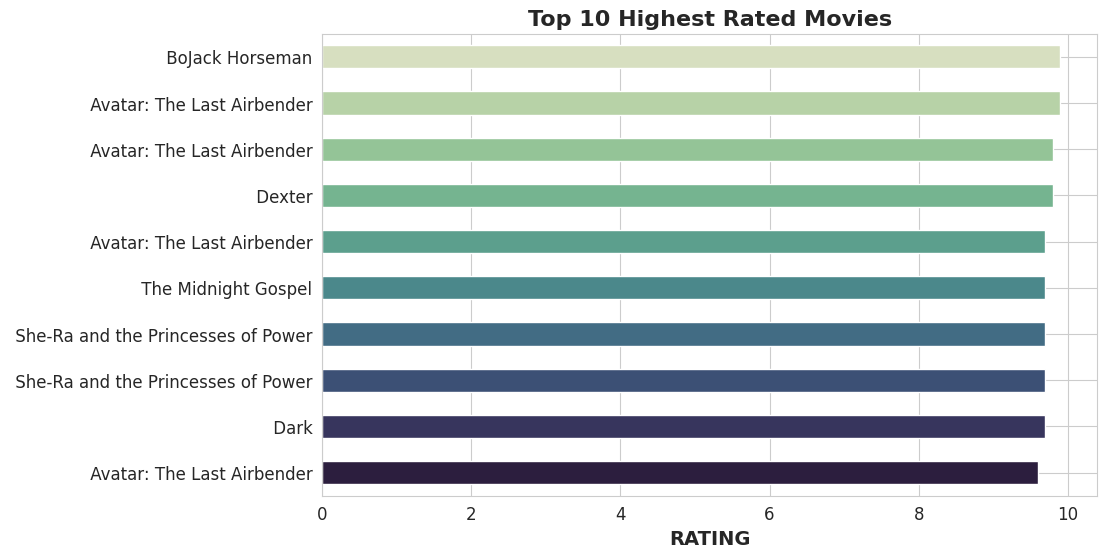

In [233]:
# Set the style and color palette
sns.set_style("whitegrid")
palette = sns.cubehelix_palette(10, start=.5, rot=-.75)

# Top 10 Highest Rated Movies
top_10 = Movies_details.nlargest(10, 'RATING')[['MOVIES', 'RATING']]

# Plot
ax = top_10.plot(kind='barh', x='MOVIES', y='RATING', color=palette, legend=False, figsize=(10,6))
plt.gca().invert_yaxis()  # To display the highest rating at the top

# Enhancing the labels, title, and ticks
plt.xlabel('RATING', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.title('Top 10 Highest Rated Movies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

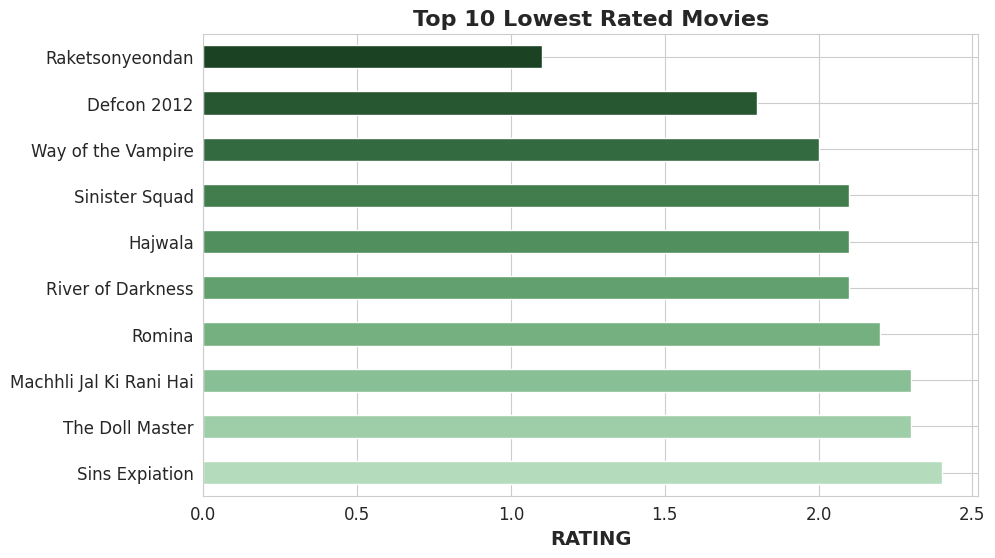

In [234]:
# Set the style and choose a distinct color palette
sns.set_style("whitegrid")
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0.2, light=.8, reverse=True)

# Top 10 Lowest Rated Movies
top_10low = Movies_details.nsmallest(10, 'RATING')[['MOVIES', 'RATING']]

# Plot
ax = top_10low.plot(kind='barh', x='MOVIES', y='RATING', color=palette, legend=False, figsize=(10,6))
plt.gca().invert_yaxis()  # To display the lowest rating at the top

# Enhancing the labels, title, and ticks
plt.xlabel('RATING', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.title('Top 10 Lowest Rated Movies', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

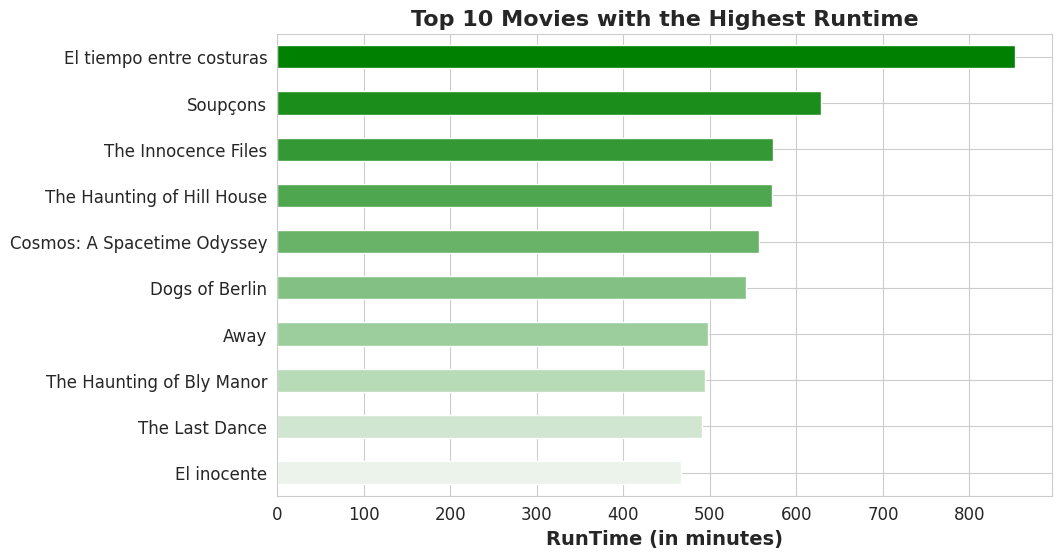

In [235]:
# Set the style and choose a distinct color palette
sns.set_style("whitegrid")
palette = sns.light_palette("green", n_colors=10, reverse=True)

# Top 10 Movies with the Highest Runtime
top_10_highest_runtime = Movies_details.nlargest(10, 'RunTime')[['MOVIES', 'RunTime']]

# Plot
ax = top_10_highest_runtime.plot(kind='barh', x='MOVIES', y='RunTime', color=palette, legend=False, figsize=(10,6))
plt.gca().invert_yaxis()  # To display the movie with the highest runtime at the top

# Enhancing the labels, title, and ticks
plt.xlabel('RunTime (in minutes)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.title('Top 10 Movies with the Highest Runtime', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

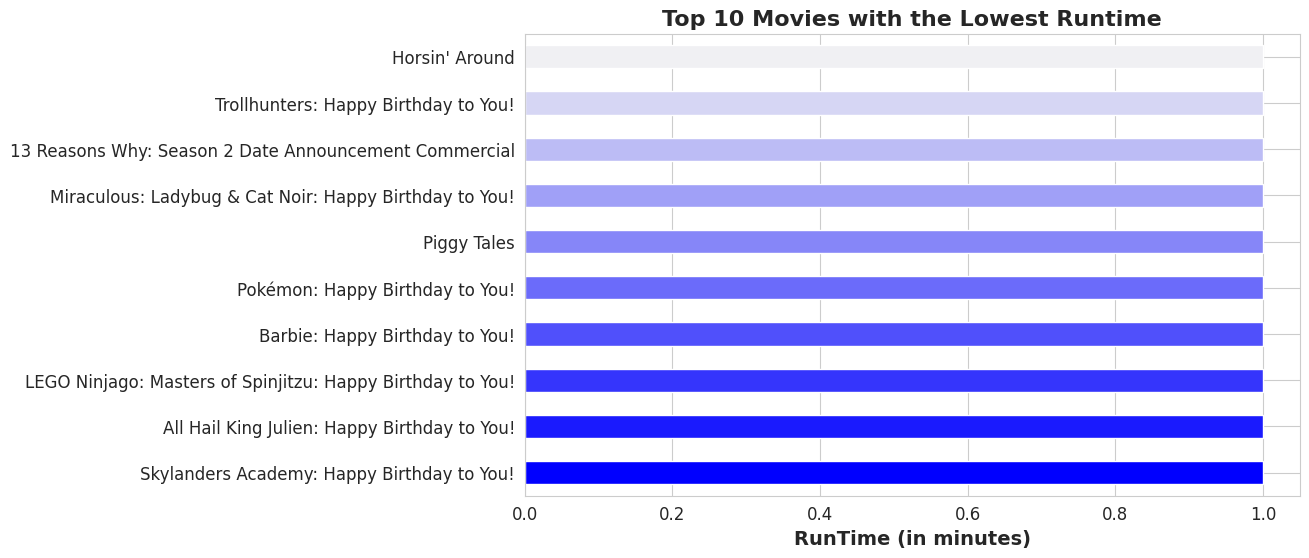

In [236]:
# Set the style and choose a distinct color palette
sns.set_style("whitegrid")
palette = sns.light_palette("blue", n_colors=10)

# Top 10 Movies with the Lowest Runtime
top_10_lowest_runtime = Movies_details.nsmallest(10, 'RunTime')[['MOVIES', 'RunTime']]

# Plot
ax = top_10_lowest_runtime.plot(kind='barh', x='MOVIES', y='RunTime', color=palette, legend=False, figsize=(10,6))
plt.gca().invert_yaxis()  # To display the movie with the lowest runtime at the top

# Enhancing the labels, title, and ticks
plt.xlabel('RunTime (in minutes)', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.title('Top 10 Movies with the Lowest Runtime', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

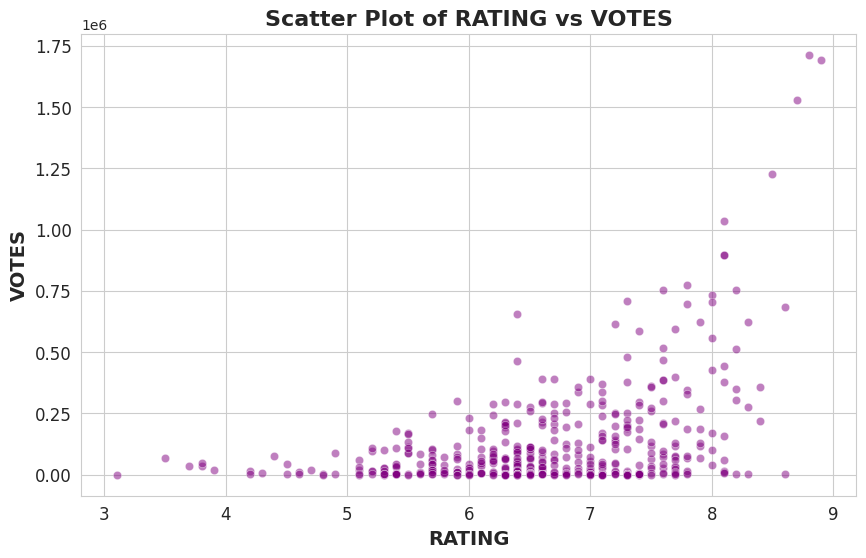

In [240]:
# Setting a style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(Movie_Gross_Value['RATING'], Movie_Gross_Value['VOTES'], color='purple', alpha=0.5, edgecolors="white", linewidth=0.5)

# Setting labels, title, and ticks
plt.xlabel('RATING', fontsize=14, fontweight='bold')
plt.ylabel('VOTES', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of RATING vs VOTES', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()